## Principal Component Analysis

El análisis de componentes principales (PCA) es un procedimiento estadístico que utiliza una transformación ortogonal que convierte un conjunto de variables correlacionadas en un conjunto de variables no correlacionadas. PCA es una herramienta muy utilizada en análisis de datos exploratorios y en aprendizaje automático para modelos predictivos. Además, PCA es una técnica estadística no supervisada utilizada para examinar las interrelaciones entre un conjunto de variables. También se conoce como un análisis factorial general donde la regresión determina una línea de mejor ajuste.

In [1]:
# Importamos las librerías necesarias

import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from  sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.decomposition import PCA
import seaborn as sns

# Representaciones graficas locales

%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

# Obviamos los errores de actualización 

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

# Ponemos la semilla
np.random.seed(0)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Importamos la función de limpieza y preprocesado de datos
import frauddef # con solo las variables de research

In [3]:
# Importamos el dataset 
df = pd.read_csv('Explor_uscecchini28.csv')

In [4]:
# Establecemos las variables X e Y
X_train_nm, X_test_nm, y_train_nm, y_test_nm, X_train_sm, X_test_sm, y_train_sm, y_test_sm = frauddef.limpieza(df)

Using TensorFlow backend.


In [5]:
# ajustamos el parametro "n_components" que nos a indicar cuantos componentes necesitamos para explicar el 95 % de los datos
pca = PCA(n_components=0.95)

# hacemos la transofrmación del Train y Test
X_train_reduced = pca.fit_transform(X_train_sm)
X_test_reduced = pca.transform(X_test_sm)

In [6]:
# Selección del número de n_components
print("Number of PCA components: ", pca.n_components_)

Number of PCA components:  3


Se han seleccionado **3 variables** que se consideran importantes para el modelo. Ahora vamos a ver el comportamiento de los tres algoritmos.

##### Logistic Regression with PCA

In [7]:
# Selección de parámetros de LR con la función "GridSearchCV"
pca_lr = LogisticRegression()

param_grid = dict(penalty = ["l1","l2"], C= np.logspace(-3,3,7))# l1 lasso l2 ridge

# establecemos la validación cruzado con 2 divisiones, los parámetros y el uso de núcleos de memoria.
grid_pca_lr = GridSearchCV(pca_lr , param_grid, cv = 2, return_train_score=True, scoring='roc_auc')

# entrenamiento con las 12 variables.
grid_pca_lr.fit(X_train_reduced, y_train_sm)

GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='roc_auc')

In [8]:
# Mejor parámetro
print("Best Parameters for Logistic Regression with PCA: ", grid_pca_lr.best_params_)

Best Parameters for Logistic Regression with PCA:  {'C': 0.001, 'penalty': 'l2'}


In [9]:
# Construcción del modelo 
pca_lr = LogisticRegression(penalty=grid_pca_lr.best_params_['penalty'],
                              C=grid_pca_lr.best_params_['C'])

# entrenamiento con las 12 variables.
pca_lr.fit(X_train_reduced, y_train_sm)

LogisticRegression(C=0.001)

Logistic Regression with PCA Training Score:  0.633913340156943
Logistic Regression with PCA Testing Score:  0.6187317590872911
- Nombre del Modelo: LogisticRegression 
 
 - Precisión: 0.6187317590872911 | 
 - Exactitud: 0.7627302275189599 | 
 - Exhaustividad: 0.36628511966701355 | 
 - F1: 0.49490333919156426 | 
 - AUC: 0.6238572322753043 |
 
 - Matriz de confusion: 
 [[1628  219]
 [1218  704]] 



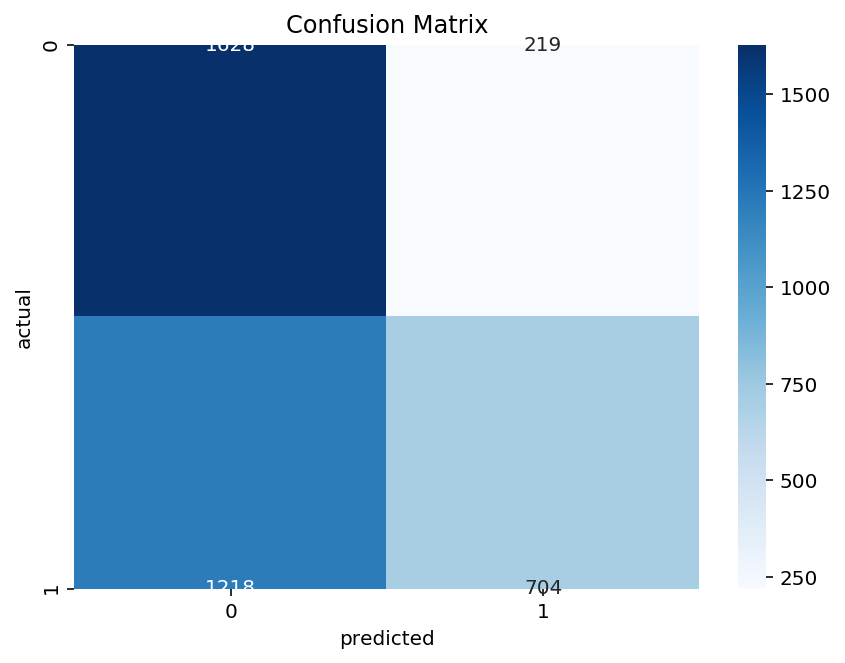

Text(0.5, 1.0, 'AUC = 0.62')

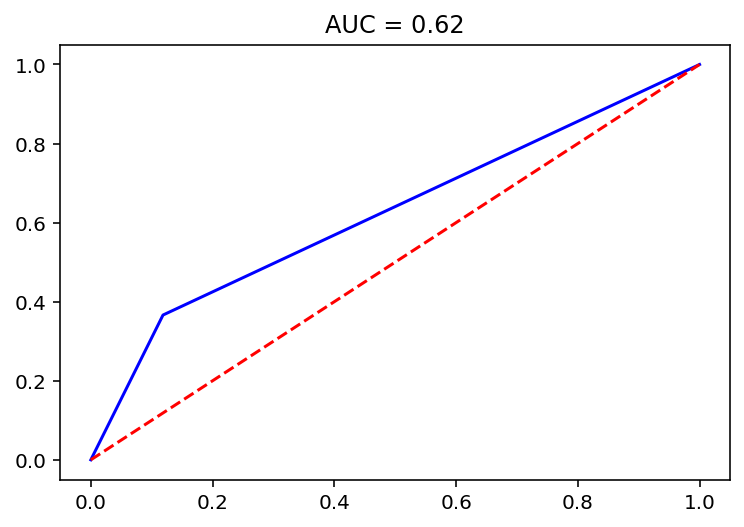

In [10]:
# Medición del rendimiento de los modelos; exactitud, exhaustividad, F1, Auc y matriz de confusión.
print("Logistic Regression with PCA Training Score: ", pca_lr.score(X_train_reduced, y_train_sm))
print("Logistic Regression with PCA Testing Score: ", pca_lr.score(X_test_reduced, y_test_sm))

y_test_pred = pca_lr.predict(X_test_reduced)
y_train_pred = pca_lr.predict(X_train_reduced)
cm = confusion_matrix(y_test_sm, y_test_pred)
false_positive_rate, recall, thresholds = roc_curve(y_test_sm, y_test_pred) # el area bajo la curva
roc_auc = auc(false_positive_rate, recall)
    
print("- Nombre del Modelo: {} \n" .format(pca_lr.__class__.__name__) , "\n - Precisión: {} |" 
        .format(accuracy_score(y_test_sm, y_test_pred)), 
        "\n - Exactitud: {} |" .format(precision_score(y_test_sm, y_test_pred)), 
        "\n - Exhaustividad: {} |" .format(recall_score(y_test_sm, y_test_pred)), 
        "\n - F1: {} |" .format(f1_score(y_test_sm, y_test_pred)), 
        "\n - AUC: {} |\n" .format(auc(false_positive_rate, recall)),
        "\n - Matriz de confusion: \n {} \n" .format(cm))

plt.figure(figsize=(7,5))
sns.heatmap(cm,  cmap= 'Blues', annot=True, fmt='3')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

plot(false_positive_rate, recall, 'b') # imprimir el ratio
plot([0, 1], [0, 1], 'r--') # difinir el ratio entre 0 y 1
title('AUC = %0.2f' % roc_auc)

In [11]:
# Guardamos la Medición del rendimiento de los modelos en una tabla.
pca_report_table_1 = ['Logistic Regression with PCA (Smote)', grid_pca_lr.best_params_, 
                      pca_lr.score(X_train_reduced, y_train_sm), pca_lr.score(X_test_reduced, y_test_sm), recall_score(y_test_sm, y_test_pred),
                 f1_score(y_test_sm, y_test_pred), auc(false_positive_rate, recall)]

##### Decision Tree Classifier with PCA

In [12]:
# Selección de parámetros de DT con la función "GridSearchCV"
pca_dt = DecisionTreeClassifier(random_state = 0)

#model param
grid_param = dict(criterion=['gini','entropy'],max_depth= np.arange(1, 15))

# establecemos la validación cruzado con 2 divisiones, los parámetros y el uso de núcleos de memoria.
grid_pca_dt = GridSearchCV(pca_dt, grid_param, cv = 2, n_jobs = -1)

# entrenamiento con las 12 variables.
grid_pca_dt.fit(X_train_reduced, y_train_sm)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [13]:
# Mejor parámetro
print("Best Parameters for Decision Tree Classifier: ", grid_pca_dt.best_params_)

Best Parameters for Decision Tree Classifier:  {'criterion': 'entropy', 'max_depth': 13}


In [14]:
# Construcción del modelo 
pca_dt = DecisionTreeClassifier(max_depth= grid_pca_dt.best_params_['max_depth']
                                ,criterion= grid_pca_dt.best_params_['criterion'])
# entrenamiento con las 12 variables.
pca_dt.fit(X_train_reduced, y_train_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=13)

Decision Tree Classifier with PCA Training Score:  0.9463209371090641
Decision Tree Classifier with PCA Testing Score:  0.8750331652958344
- Nombre del Modelo: DecisionTreeClassifier 
 
 - Precisión: 0.8750331652958344 | 
 - Exactitud: 0.8479616306954436 | 
 - Exhaustividad: 0.9198751300728408 | 
 - F1: 0.882455702520589 | 
 - AUC: 0.8741227301690678 |
 
 - Matriz de confusion: 
 [[1530  317]
 [ 154 1768]] 



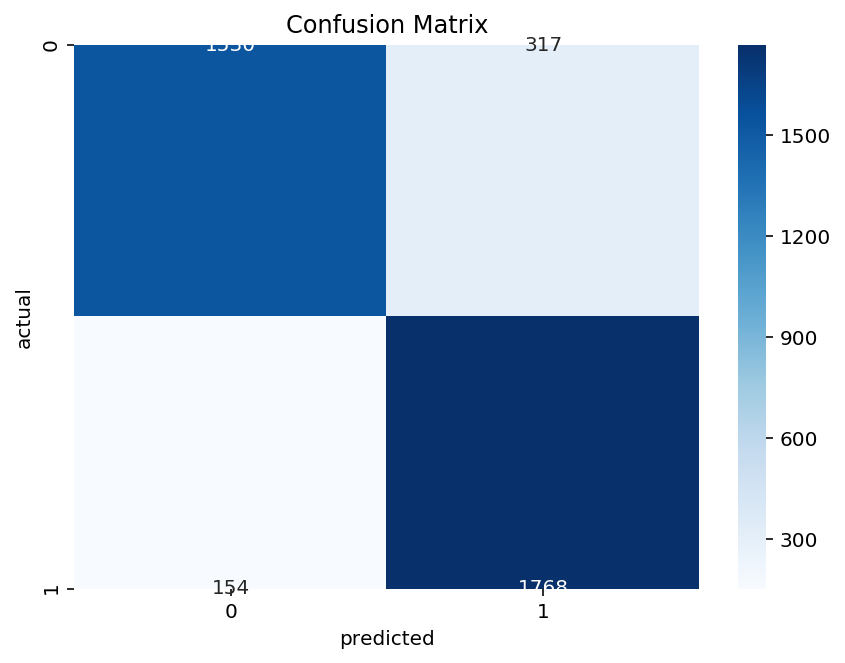

Text(0.5, 1.0, 'AUC = 0.87')

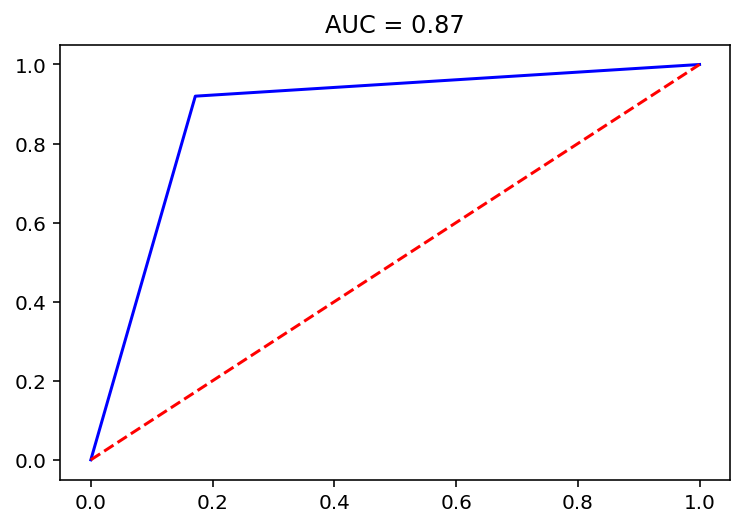

In [15]:
# Medición del rendimiento de los modelos; exactitud, exhaustividad, F1, Auc y matriz de confusión.
print("Decision Tree Classifier with PCA Training Score: ", pca_dt.score(X_train_reduced, y_train_sm))
print("Decision Tree Classifier with PCA Testing Score: ", pca_dt.score(X_test_reduced, y_test_sm))

y_test_pred = pca_dt.predict(X_test_reduced)
y_train_pred = pca_dt.predict(X_train_reduced)
cm = confusion_matrix(y_test_sm, y_test_pred)
false_positive_rate, recall, thresholds = roc_curve(y_test_sm, y_test_pred) # el area bajo la curva
roc_auc = auc(false_positive_rate, recall)
    
print("- Nombre del Modelo: {} \n" .format(pca_dt.__class__.__name__) , "\n - Precisión: {} |" 
        .format(accuracy_score(y_test_sm, y_test_pred)), 
        "\n - Exactitud: {} |" .format(precision_score(y_test_sm, y_test_pred)), 
        "\n - Exhaustividad: {} |" .format(recall_score(y_test_sm, y_test_pred)), 
        "\n - F1: {} |" .format(f1_score(y_test_sm, y_test_pred)), 
        "\n - AUC: {} |\n" .format(auc(false_positive_rate, recall)),
        "\n - Matriz de confusion: \n {} \n" .format(cm))

plt.figure(figsize=(7,5))
sns.heatmap(cm,  cmap= 'Blues', annot=True, fmt='3')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

plot(false_positive_rate, recall, 'b') # imprimir el ratio
plot([0, 1], [0, 1], 'r--') # difinir el ratio entre 0 y 1
title('AUC = %0.2f' % roc_auc)

In [16]:
# Guardamos la Medición del rendimiento de los modelos en una tabla.
pca_report_table_2 = ['Decision Tree Classifier with PCA (Smote)', grid_pca_dt.best_params_, 
                      pca_dt.score(X_train_reduced, y_train_sm), pca_dt.score(X_test_reduced, y_test_sm), recall_score(y_test_sm, y_test_pred),
                 f1_score(y_test_sm, y_test_pred), auc(false_positive_rate, recall) ]

##### Random Forest Classifier with PCA

In [17]:
# Selección de parámetros de RF con la función "GridSearchCV"

pca_rf = RandomForestClassifier()
param_grid = dict(max_depth=[1,3,5,7,9,15], 
                  n_estimators= [100,250,500],criterion=['gini', 'entropy'])

# establecemos la validación cruzado con 2 divisiones, los parámetros y el uso de núcleos de memoria.
grid_pca_rf = GridSearchCV(pca_rf, param_grid, cv = 2, n_jobs = -1, return_train_score= True)

# entrenamiento con las 12 variables.
grid_pca_rf.fit(X_train_reduced, y_train_sm)

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9, 15],
                         'n_estimators': [100, 250, 500]},
             return_train_score=True)

In [18]:
# Mejor parámetro
print("Best Parameters for KNN Classifier with PCA: ", grid_pca_rf.best_params_)

Best Parameters for KNN Classifier with PCA:  {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 250}


In [19]:
# Construcción del modelo 
pca_rf = RandomForestClassifier(n_estimators= grid_pca_rf.best_params_['n_estimators']
                                , max_depth= grid_pca_rf.best_params_['max_depth']
                                ,criterion = grid_pca_rf.best_params_['criterion'])


# entrenamiento con las 12 variables.
pca_rf.fit(X_train_reduced, y_train_sm)

RandomForestClassifier(max_depth=15, n_estimators=250)

Random Forest Classifier with PCA Training Score:  0.9869214147617423
Random Forest Classifier with PCA Testing Score:  0.913239586097108
- Nombre del Modelo: RandomForestClassifier 
 
 - Precisión: 0.913239586097108 | 
 - Exactitud: 0.8938271604938272 | 
 - Exhaustividad: 0.9417273673257024 | 
 - F1: 0.9171522675449709 | 
 - AUC: 0.9126611931376754 |
 
 - Matriz de confusion: 
 [[1632  215]
 [ 112 1810]] 



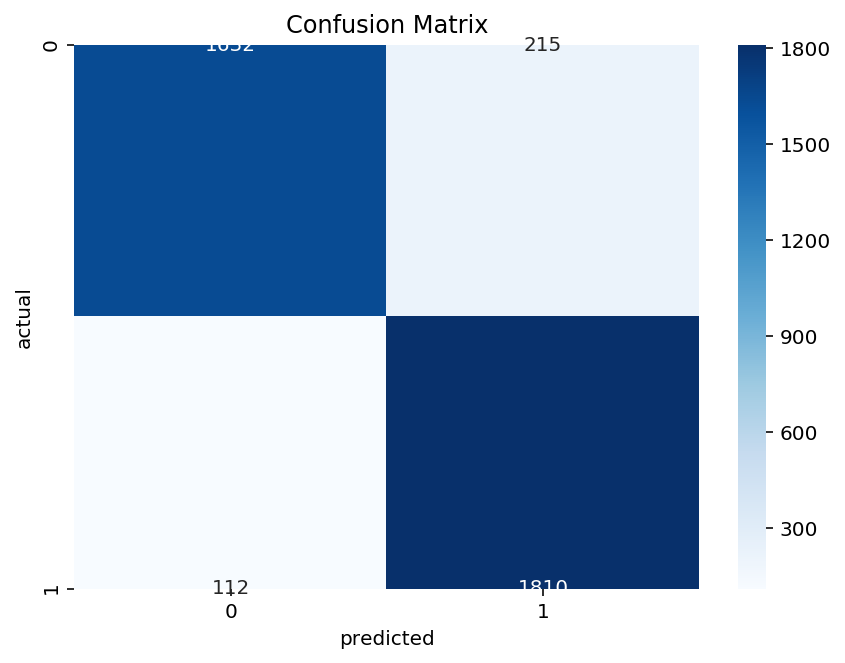

Text(0.5, 1.0, 'AUC = 0.91')

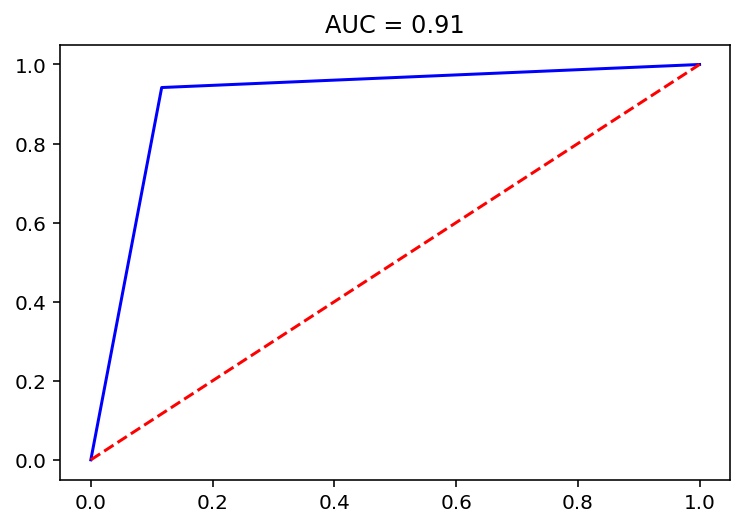

In [20]:
# Medición del rendimiento de los modelos; exactitud, exhaustividad, F1, Auc y matriz de confusión.

print("Random Forest Classifier with PCA Training Score: ", pca_rf.score(X_train_reduced, y_train_sm))
print("Random Forest Classifier with PCA Testing Score: ", pca_rf.score(X_test_reduced, y_test_sm))

y_test_pred = pca_rf.predict(X_test_reduced)
y_train_pred = pca_rf.predict(X_train_reduced)
cm = confusion_matrix(y_test_sm, y_test_pred)
false_positive_rate, recall, thresholds = roc_curve(y_test_sm, y_test_pred) # el area bajo la curva
roc_auc = auc(false_positive_rate, recall)
    
print("- Nombre del Modelo: {} \n" .format(pca_rf.__class__.__name__) , "\n - Precisión: {} |" 
        .format(accuracy_score(y_test_sm, y_test_pred)), 
        "\n - Exactitud: {} |" .format(precision_score(y_test_sm, y_test_pred)), 
        "\n - Exhaustividad: {} |" .format(recall_score(y_test_sm, y_test_pred)), 
        "\n - F1: {} |" .format(f1_score(y_test_sm, y_test_pred)), 
        "\n - AUC: {} |\n" .format(auc(false_positive_rate, recall)),
        "\n - Matriz de confusion: \n {} \n" .format(cm))

plt.figure(figsize=(7,5))
sns.heatmap(cm,  cmap= 'Blues', annot=True, fmt='3')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

plot(false_positive_rate, recall, 'b') # imprimir el ratio
plot([0, 1], [0, 1], 'r--') # difinir el ratio entre 0 y 1
title('AUC = %0.2f' % roc_auc)

In [21]:
# Guardamos la Medición del rendimiento de los modelos en una tabla.
pca_report_table_3 = ['Random Forest Classifier with PCA (Smote)', grid_pca_rf.best_params_, 
                      pca_rf.score(X_train_reduced, y_train_sm), pca_rf.score(X_test_reduced, y_test_sm), recall_score(y_test_sm, y_test_pred),
                 f1_score(y_test_sm, y_test_pred), auc(false_positive_rate, recall)]

##### Generating a Report table: PCA

Para comparar todos los modelos, creemos una tabla y un diagrama.

In [22]:
# Guardamos la Medición del rendimiento de los modelos en una tabla.
pca_report_table = pd.DataFrame(list(zip(pca_report_table_1,
             pca_report_table_2, pca_report_table_3 ))).transpose()

In [23]:
pca_report_table.columns = ['Model Name', 'Model Parameter', 'Training Score', 'Testing Score', "Exhaustividad", "F1", "AUC"]
pca_report_table.index = pca_report_table['Model Name']

In [24]:
pca_report_table.head(15)

,Model Name,Model Parameter,Training Score,Testing Score,Exhaustividad,F1,AUC
Model Name,,,,,,,
Logistic Regression with PCA (Smote),Logistic Regression with PCA (Smote),"{'C': 0.001, 'penalty': 'l2'}",0.633913,0.618732,0.366285,0.494903,0.623857
Decision Tree Classifier with PCA (Smote),Decision Tree Classifier with PCA (Smote),"{'criterion': 'entropy', 'max_depth': 13}",0.946321,0.875033,0.919875,0.882456,0.874123
Random Forest Classifier with PCA (Smote),Random Forest Classifier with PCA (Smote),"{'criterion': 'gini', 'max_depth': 15, 'n_esti...",0.986921,0.91324,0.941727,0.917152,0.912661


In [26]:
# guardamos los resultados
pca_report_table.to_csv('Individual_With_PCA_Smote.csv')

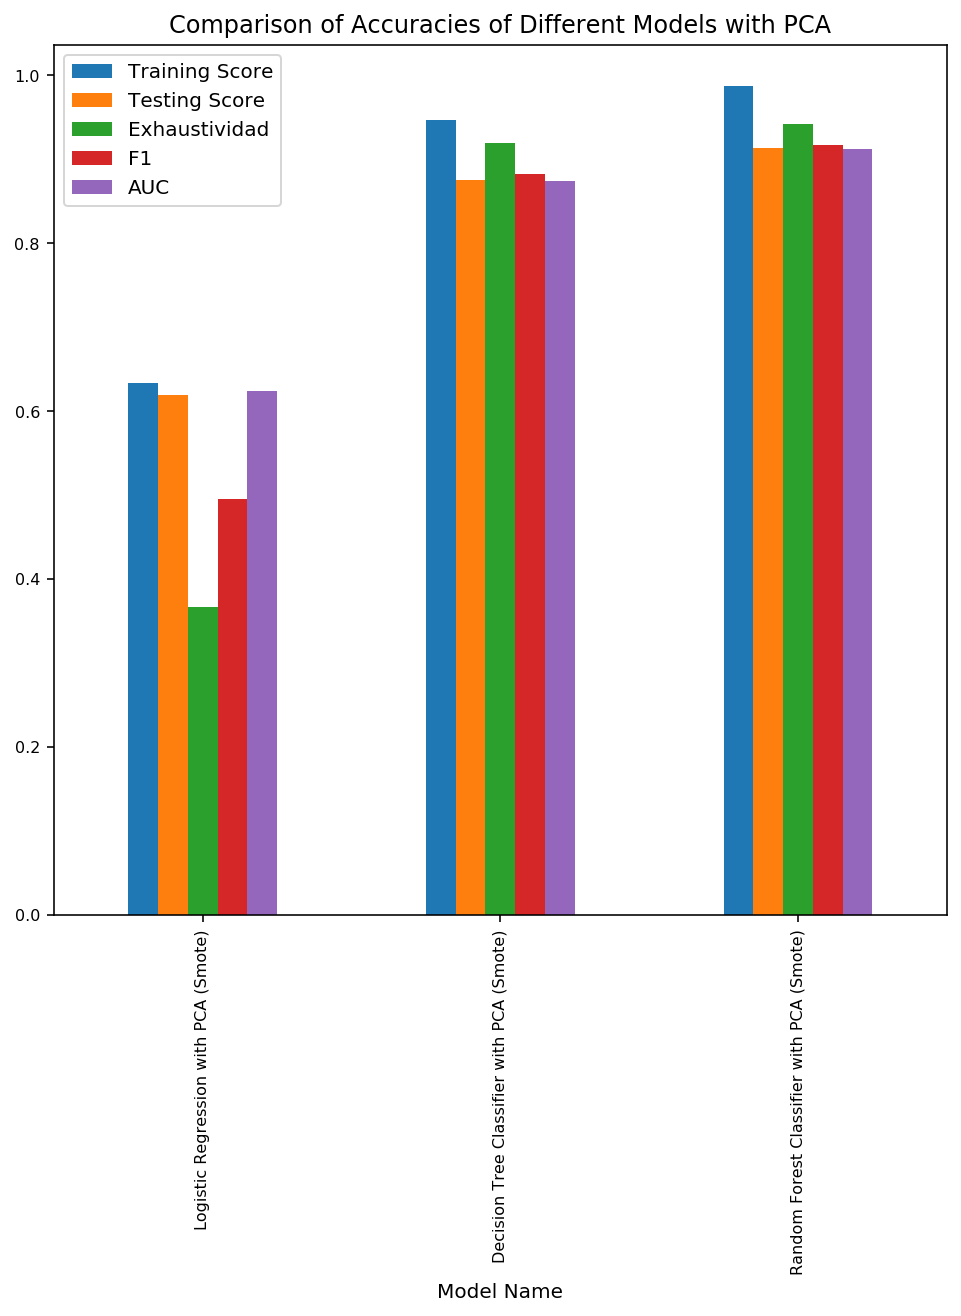

In [27]:
ax = pca_report_table[['Model Name', 'Model Parameter', 'Training Score', 'Testing Score', "Exhaustividad", "F1", "AUC"]].plot(kind='bar',
            title = "Comparison of Accuracies of Different Models with PCA", figsize=(8, 8), fontsize = 8)
plt.show()

Feature: 0, Score: 0.33746
Feature: 1, Score: 0.37705
Feature: 2, Score: 0.28549


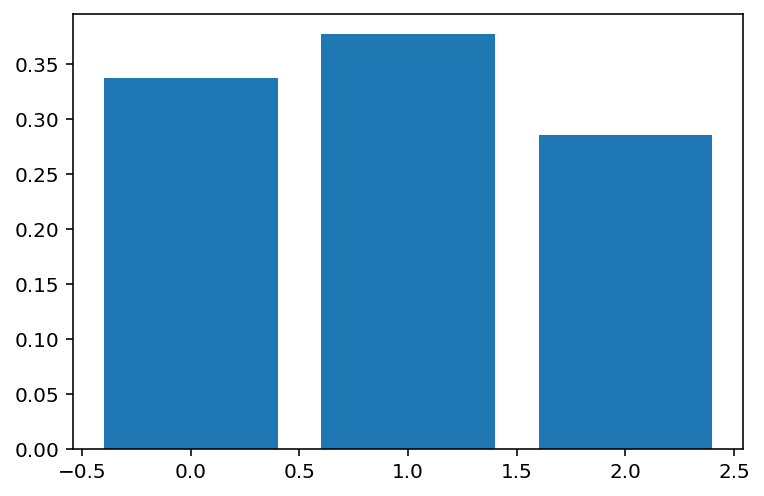

In [28]:
importance = pca_rf.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()